# `pygeostats` SNESIM

In [9]:
import numpy
import os, sys
import pygeostat as gs
import matplotlib.pyplot as plt

from src.helpers.funcs import *

ImportError: cannot import name 'MutableMapping' from 'collections' (C:\Users\Gustavo Scholze\AppData\Local\Programs\Python\Python310\lib\collections\__init__.py)

In [5]:
snesim_model = gs.Program(program="gan_bin\\snesim.exe")

for idx, im in enumerate(os.listdir()):
    if im.endswith('.out'):
        par_string = f'''
                Parameters for SNESIM
                 ***********************

        START OF PARAMETERS:
        samples50.out             - file with original data
        1  2  3  4                    - columns for x, y, z, variable
        2                             - number of categories
        0   1                         - category codes
        0.7  0.3                      - (target) global pdf
        0                             - use (target) vertical proportions (0=no, 1=yes)
        vertprop.dat                  - file with target vertical proportions
        0                             - servosystem parameter (0=no correction)
        -1                            - debugging level: 0,1,2,3
        nsnesim.dbg                    - debugging file
        {im.split('.')[0]+'_snesim'}.out    - file for simulation output
        1                             - number of realizations to generate
        150    0.5    1.0             - nx,xmn,xsiz
        150    0.5    1.0             - ny,ymn,ysiz
        1     0.5    1.0              - nz,zmn,zsiz
        303258                        - random number seed
        30                            - max number of conditioning primary data
        10                            - min. replicates number
        0 0                           - condtion to LP (0=no, 1=yes), flag for iauto
        1.0 1.0                       - two weighting factors to combine P(A|B) and P(A|C)
        localprop.dat                 - file for local proportions
        0                             - condition to rotation and affinity (0=no, 1=yes)
        rotangle.dat                  - file for rotation and affinity
        3                             - number of affinity categories
        1.0  1.0  1.0                 - affinity factors (X,Y,Z)     
        1.0  0.6  1.0                 - affinity factors             
        1.0  2.0  1.0                 - affinity factors             
        6                             - number of multiple grids
        {im}          - file for training image
        150  150  1                   - training image dimensions: nxtr, nytr, nztr
        1                             - column for training variable
        10.0   10.0   5.0             - maximum search radii (hmax,hmin,vert)
        0.0    0.0   0.0              - angles for search ellipsoid
        '''
        #print(par_string)
        snesim_model.run(par_string)

NameError: name 'gs' is not defined

In [3]:
file = read_conditional_samples("bin/gan_snesim_150x150.out")["D"]
realizations = file[:, 0].reshape(1, 150, 150)

eas: file ->bin/gan_snesim_150x150.out
eas: title-> SNESIM Realizations


In [3]:
plt.imshow(realizations[1], 'binary')

NameError: name 'realizations' is not defined

# `pygeostats`

In [1]:
import numpy
import os, sys
import pygeostat as gs
import matplotlib.pyplot as plt

from src.helpers.funcs import *

In [8]:
# Setting the cat dictionary
gs.Parameters['data.catdict'] = {1: 'Sandstone', 0: 'Shale'}
gs.Parameters.describe('data.catdict')

gs.Parameters['data.griddef'] = gs.GridDef([150, 0.5, 1.0,
                                            150, 0.5, 1.0,
                                            1.0, 0.5, 1.0])

# Default plot settings
gs.PlotStyle['font.size'] = 13
gs.PlotStyle['figure.figsize'] = (16, 9)

def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=True, **kwargs)
    patch = plt.
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

data.catdict:
When initializing a DataFile, this dictionary will be used as DataFile.catdict (if catdict.keys() matches DataFile.cat codes). This dictionary is formaatted as {catcodes: catnames}.


In [3]:
file = read_conditional_samples("bin/snesim_150x150.out")["D"]
realizations = file[:, 0].reshape(100, 150, 150)

eas: file ->bin/snesim_150x150.out
eas: title-> SNESIM Realizations


In [5]:
import cv2
import pandas as pd
from src.helpers.funcs import read_conditional_samples

conditioning_data = read_conditional_samples("data/conditioning_data/samples50")["D"]

# Hard data
print("[INFO] Loading conditional data")

# Samples to dataframe
samples_im = pd.DataFrame()

samples_im['x'] = conditioning_data[:,0]
samples_im['y'] = conditioning_data[:,1]
samples_im['class'] = conditioning_data[:,3]

eas: file ->data/conditioning_data/samples50
eas: title->           eas title
[INFO] Loading conditional data


In [6]:
import pandas as pd

ti_dict = dict()

for idx, realization in enumerate(realizations):
    ti_dict[f'ti_{idx+1}'] = np.array(realization.reshape(-1))

dataframe = pd.DataFrame(ti_dict)
dataframe

,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,ti_9,ti_10,...,ti_91,ti_92,ti_93,ti_94,ti_95,ti_96,ti_97,ti_98,ti_99,ti_100
0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22498,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


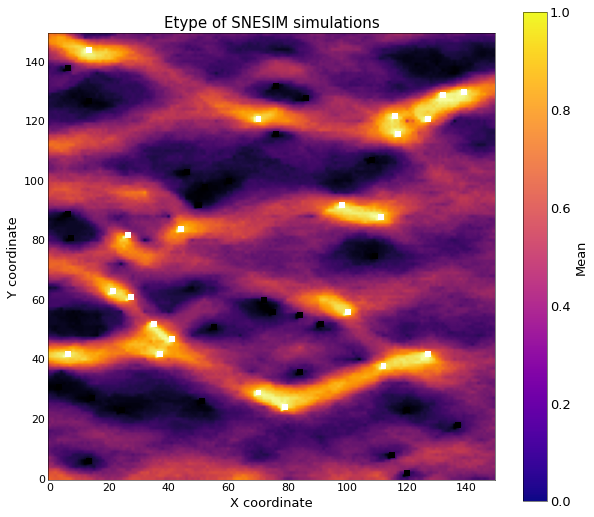

In [42]:
import matplotlib as mpl

plt.figure(figsize=(10,9))

# get mean for each row
dataframe['etype'] = dataframe.mean(axis=1)
plt.imshow(dataframe['etype'].values.reshape(150, 150),
          cmap='inferno', origin='lower')

for row in samples_im.values:
    x, y, class_ = row[0], row[1], row[2]
    start_point = (int(x), int(y))
    end_point = (int(x+1), int(y+1))
    if class_== 0.:
        highlight_cell(x,y, color="black", linewidth=3)
    else:
        highlight_cell(x,y, color="white", linewidth=3)

plt.title("Etype of SNESIM simulations", size=15)
plt.xlabel("X coordinate", size=13)
plt.ylabel("Y coordinate", size=13)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='vertical', spacing="proportional")
cb.ax.tick_params(labelsize=13)
cb.set_label("Mean", size=13)

# Saving images to .df format
plt.grid(False)
plt.show()

In [52]:
dataframe.drop('etype', axis=1, inplace=True)
dataframe['prob_sand'] = dataframe.sum(axis=1)
dataframe['prob_shale'] = 100 - dataframe['prob_sand']

dataframe["u_max"] = dataframe[["prob_shale", "prob_sand"]].max(axis=1) / 100
dataframe["u_min"] = dataframe[["prob_shale", "prob_sand"]].min(axis=1) / 100

dataframe.drop('prob_sand', axis=1, inplace=True)
dataframe.drop('prob_shale', axis=1, inplace=True)
#dataframe.drop('u', axis=1, inplace=True)

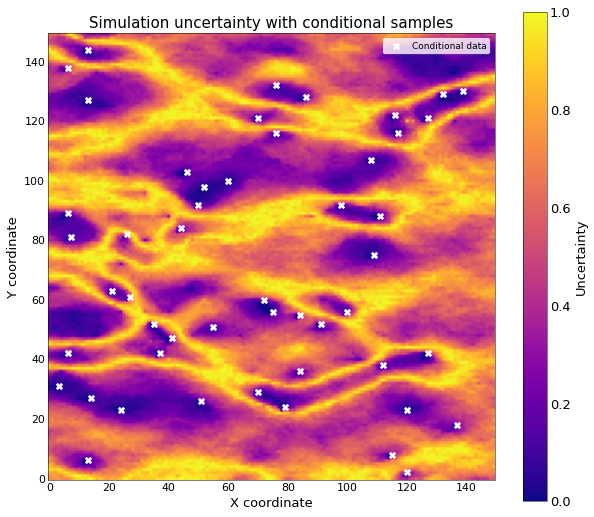

In [80]:
import matplotlib as mpl

plt.figure(figsize=(10,9))

plt.imshow(dataframe['u_min'].values.reshape(150, 150),
          cmap='plasma', origin='lower')

for row in samples_im.values:
    plt.scatter(row[0], row[1], marker='X',
                color='white')

plt.legend(["Conditional data"], loc=0,
           frameon=True, fontsize=9)
    
plt.title("Simulation uncertainty with conditional samples", size=15)
plt.xlabel("X coordinate", size=13)
plt.ylabel("Y coordinate", size=13)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='vertical', spacing="proportional")
cb.ax.tick_params(labelsize=13)
cb.set_label("Uncertainty", size=13)

# Saving images to .df format
plt.grid(False)
plt.savefig('uncertainty.png', dpi=500, bbox_inches="tight")
plt.show()

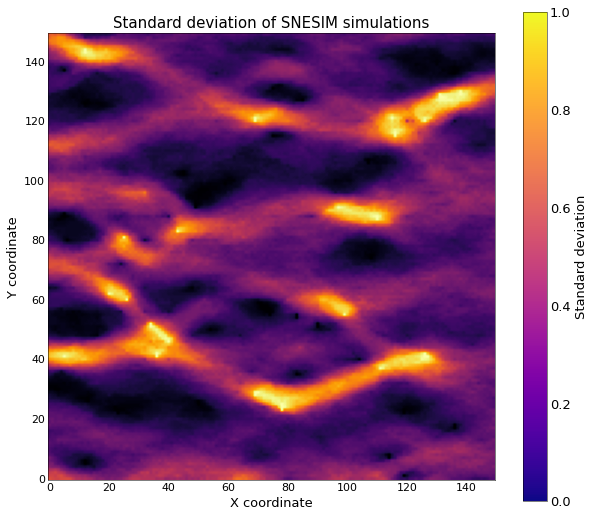

In [15]:
import matplotlib as mpl

plt.figure(figsize=(10,9))
# get mean for each row
dataframe['std'] = dataframe.std(axis=1)
plt.imshow(dataframe['std'].values.reshape(150, 150),
          cmap='inferno', origin='lower')

plt.title("Standard deviation of SNESIM simulations", size=15)
plt.xlabel("X coordinate", size=13)
plt.ylabel("Y coordinate", size=13)

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='vertical', spacing="proportional")
cb.ax.tick_params(labelsize=13)
cb.set_label("Standard deviation", size=13)

# Saving images to .df format
plt.grid(False)
plt.show()

In [ ]:
gs.slice_plot(dataframe, grid, cmap='binary_r', cbar_label='Facies')

In [ ]:
import random
rand_idxs = [random.randint(0, 100) for i in range(16)]

tis_sampled = [realizations[i] for i in rand_idxs]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 9))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, tis_sampled):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray", origin="lower")

fig.suptitle("SNESIM realizations", fontsize=15)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("X coordinate", size=13)
plt.ylabel("Y coordinate", size=13)

fig.tight_layout()

plt.show()

In [ ]:
grid = gs.GridDef([64, 0.5, 1.0,
                   64, 0.5, 1.0,
                   1.0, 0.0, 0.0])
sim = gs.DataFile("snesim.out", griddef=grid,
                  cat="category", nreals=100, tmin=-990)
sim.data.columns=['category', "_"]
sim.variables = ['category']

# Summary statistics
print('\nProperties of the realization:\n', sim.describe())